In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
sns.set_theme(style="dark",palette=sns.color_palette("husl",2))

In [3]:
data=pd.read_csv("AveragedWhole2017.csv",index_col=[0])
data.head()

,country,Total area of the country (excl. coastal water) (1000 ha),Rural population (1000 inhab),Urban population (1000 inhab),Population density (inhab/km2),GDP per capita (current US$/inhab),"Agriculture, value added (% GDP) (%)",Urban population with access to safe drinking-water (JMP) (%),Total renewable water resources per capita (m3/inhab/yr),Total population with access to safe drinking-water (JMP) (%),...,National Rainfall Index (NRI) (mm/yr),"Mortality rate, infant (per 1,000 live births)",longitude,latitude,population ages0-14,Population ages 65 and above(-of total population),Net official development assistance and official aid received (current US$),% of total cultivated area drained (%),Total exploitable water resources (10^9 m3/yr),index
0,New Zealand,0.015642,0.000716,0.004805,0.001962,0.396262,0.070084,1.000000,0.136795,1.000000,...,0.319317,0.028967,0.987118,0.000000,0.192881,0.552696,0.066222,0.054238,0.030930,4.0
1,Argentina,0.162600,0.004108,0.048146,0.001740,0.131169,0.066011,0.979716,0.039228,0.986823,...,0.293332,0.083123,0.308626,0.023469,0.326948,0.375726,0.059579,0.038557,0.024691,1.0
2,Chile,0.044206,0.002540,0.018711,0.002827,0.139052,0.046595,0.993915,0.098302,0.985359,...,0.694681,0.055416,0.286077,0.049361,0.190953,0.399508,0.107366,0.012100,0.004068,1.0
3,Uruguay,0.010291,0.000185,0.003884,0.002206,0.155774,0.061538,1.000000,0.098561,0.995608,...,0.431163,0.056675,0.330960,0.079138,0.216647,0.513482,0.075057,0.166123,0.028160,1.0
4,South Africa,0.071285,0.021782,0.044268,0.005641,0.055066,0.028282,0.991886,0.001772,0.900439,...,0.148242,0.326196,0.554855,0.097683,0.443522,0.158638,0.147194,0.004087,0.004927,2.0


In [4]:
#delete null 

data.isnull().sum()

country                                                                                  0
Total area of the country (excl. coastal water) (1000 ha)                                0
Rural population (1000 inhab)                                                            0
Urban population (1000 inhab)                                                            0
Population density (inhab/km2)                                                           0
GDP per capita (current US$/inhab)                                                       0
Agriculture, value added (% GDP) (%)                                                     0
Urban population with access to safe drinking-water (JMP) (%)                            0
Total renewable water resources per capita (m3/inhab/yr)                                 0
Total population with access to safe drinking-water (JMP) (%)                            0
Municipal water withdrawal (km<sup>3</sup>/year or 10<sup>9</sup>m<sup>3</sup>/year)     0

In [5]:
data=data.dropna()

In [6]:
# Group index into two classes

data['index']=data['index'].map({1:0,2:0,3:1,4:1})

In [7]:
# To exclude the possibility of water stress to be the respond variable by looking at the correlation between it and the others.

data[['Rural population (1000 inhab)', 
           'Urban population (1000 inhab)',
           'Population density (inhab/km2)',
           'Urban population with access to safe drinking-water (JMP) (%)',
           'Rural population with access to safe drinking-water (JMP) (%)',
           'Total population with access to safe drinking-water (JMP) (%)',
           'population ages0-14',
           'Population ages 65 and above(-of total population)'
     ]].corrwith(data['SDG 6.4.2. Water Stress (%)'])


Rural population (1000 inhab)                                   -0.015218
Urban population (1000 inhab)                                   -0.015448
Population density (inhab/km2)                                   0.013793
Urban population with access to safe drinking-water (JMP) (%)    0.023547
Rural population with access to safe drinking-water (JMP) (%)    0.088518
Total population with access to safe drinking-water (JMP) (%)    0.069553
population ages0-14                                             -0.088347
Population ages 65 and above(-of total population)              -0.140832
dtype: float64

In [8]:
# The mean value of 0 and 1 classes

data[['Rural population (1000 inhab)', 
           'Urban population (1000 inhab)',
           'Population density (inhab/km2)',
           'Urban population with access to safe drinking-water (JMP) (%)',
           'Rural population with access to safe drinking-water (JMP) (%)',
           'Total population with access to safe drinking-water (JMP) (%)',
           'population ages0-14',
           'Population ages 65 and above(-of total population)','index'
     ]].groupby('index').mean().T

index,0,1
Rural population (1000 inhab),0.021621,0.020392
Urban population (1000 inhab),0.026879,0.027685
Population density (inhab/km2),0.017495,0.039555
Urban population with access to safe drinking-water (JMP) (%),0.895596,0.857228
Rural population with access to safe drinking-water (JMP) (%),0.836822,0.762336
Total population with access to safe drinking-water (JMP) (%),0.850683,0.767303
population ages0-14,0.342703,0.502567
Population ages 65 and above(-of total population),0.344825,0.205484


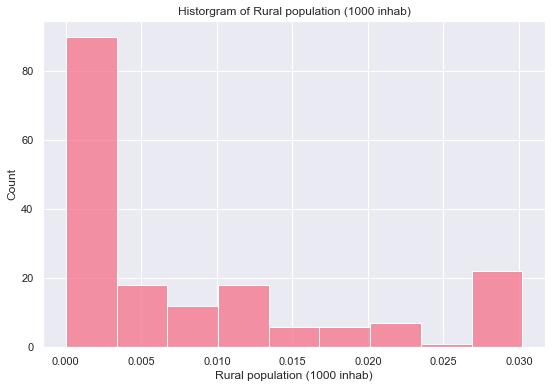

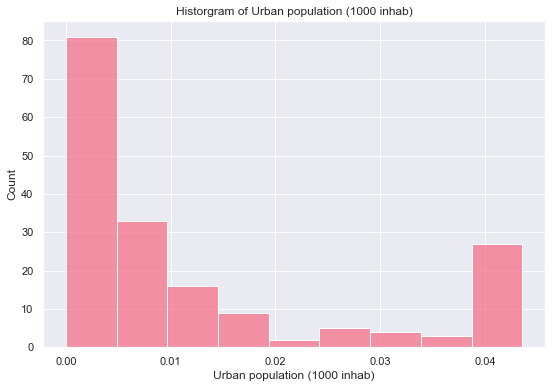

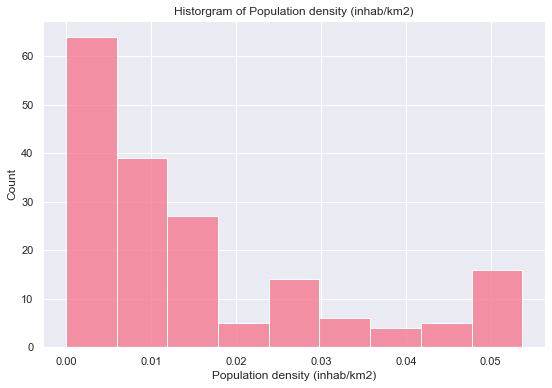

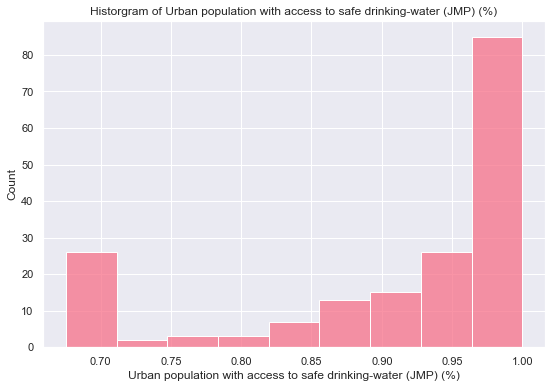

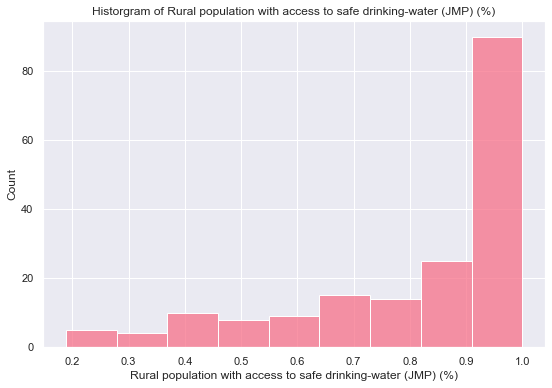

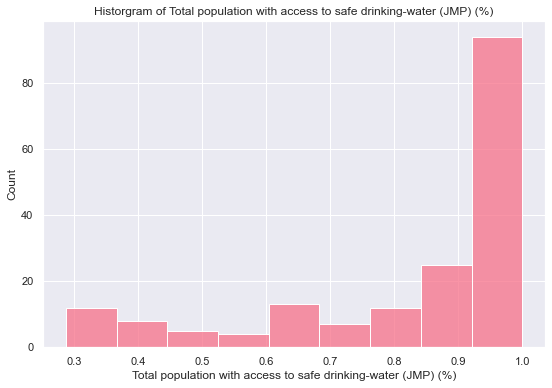

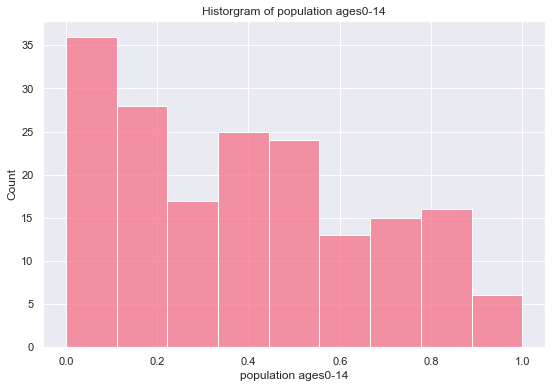

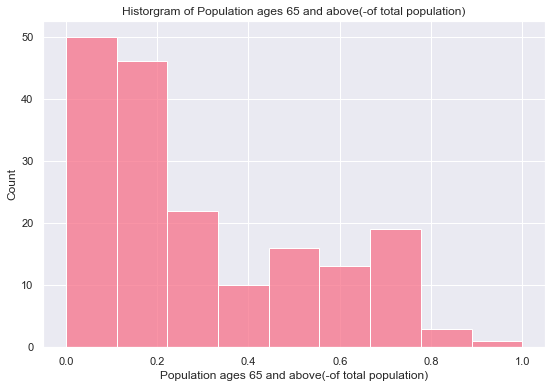

In [14]:
#Use 1.5  IQR to replace outliers
cols=['Rural population (1000 inhab)', 
           'Urban population (1000 inhab)',
           'Population density (inhab/km2)',
           'Urban population with access to safe drinking-water (JMP) (%)',
           'Rural population with access to safe drinking-water (JMP) (%)',
           'Total population with access to safe drinking-water (JMP) (%)',
           'population ages0-14',
           'Population ages 65 and above(-of total population)']
for col in cols:
    q1=data[col].quantile(0.25)
    q3=data[col].quantile(0.75)
    iqr=q3-q1
    lower=q1-1.5*iqr
    upper=q3+1.5*iqr
    
    data[col]=data[col].map(lambda x:x if x> lower else lower)
    data[col]=data[col].map(lambda x:x if x< upper else upper)
for col in ['Rural population (1000 inhab)', 
           'Urban population (1000 inhab)',
           'Population density (inhab/km2)',
           'Urban population with access to safe drinking-water (JMP) (%)',
           'Rural population with access to safe drinking-water (JMP) (%)',
           'Total population with access to safe drinking-water (JMP) (%)',
           'population ages0-14',
           'Population ages 65 and above(-of total population)']:
    plt.figure(figsize=(9,6))
    sns.histplot(x=col,data=data)
    plt.title("Historgram of {}".format(col),fontsize=12)
    
    plt.grid()
    plt.show()

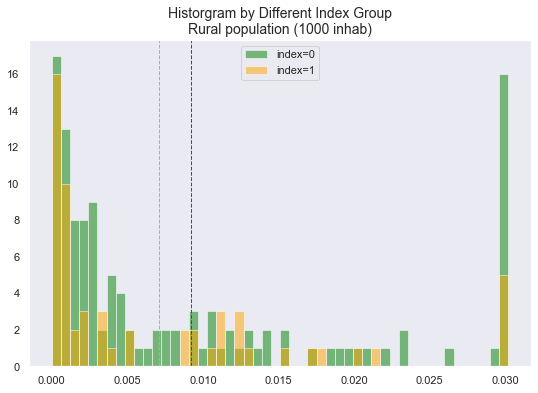

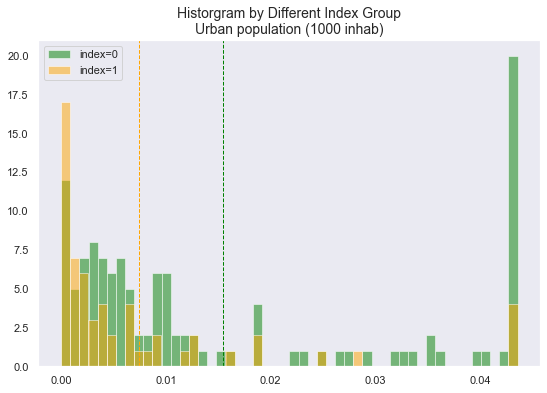

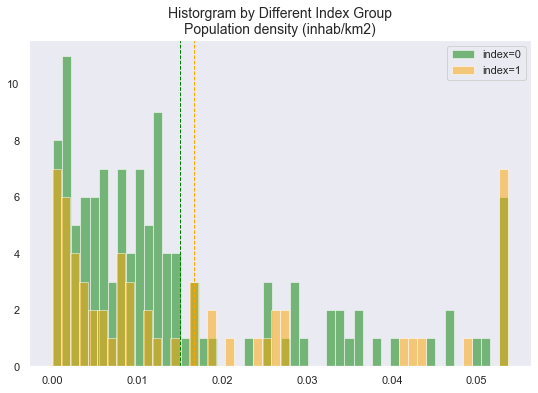

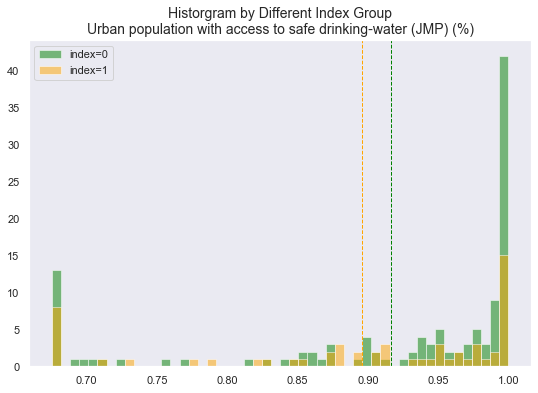

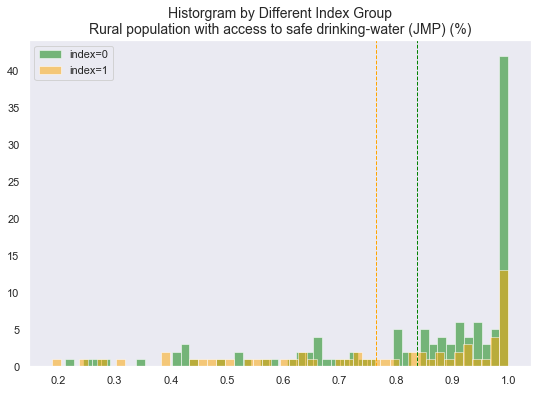

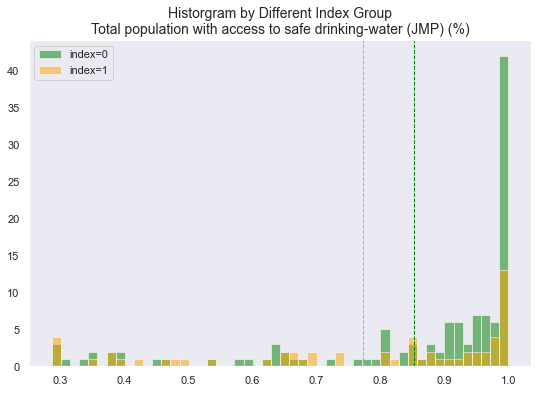

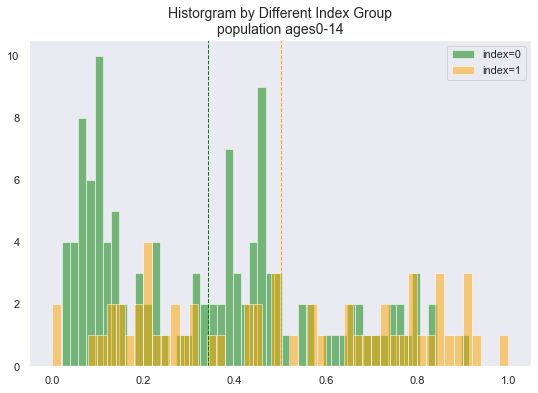

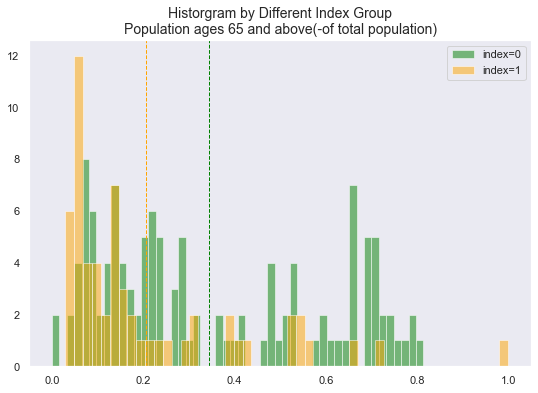

In [15]:
# See the difference of 0 and 1 in each variable

for x in ['Rural population (1000 inhab)', 
           'Urban population (1000 inhab)',
           'Population density (inhab/km2)',
           'Urban population with access to safe drinking-water (JMP) (%)',
           'Rural population with access to safe drinking-water (JMP) (%)',
           'Total population with access to safe drinking-water (JMP) (%)',
           'population ages0-14',
           'Population ages 65 and above(-of total population)'
     ]:
    plt.figure(figsize=(9,6))
    g1=data[data["index"]==0][x].values
    g2=data[data["index"]==1][x].values
    
    plt.hist(g1,bins=50,label="index=0",color='green',alpha=0.5)
    plt.hist(g2,bins=50,label="index=1",color='orange',alpha=0.5)
    
    # 画两根竖线，表示两组数据的均值
    g1_mean=g1.mean()
    g2_mean=g2.mean()
    plt.axvline(g1_mean,ls='--',c='green',linewidth=1)
    plt.axvline(g2_mean,ls='--',c='orange',linewidth=1)
    
    plt.legend()
    plt.title("Historgram by Different Index Group\n{}".format(x),fontsize=14)
    plt.show()

In [16]:
# Use t.test to see the significance of variables

for col in ['Rural population (1000 inhab)', 
           'Urban population (1000 inhab)',
           'Population density (inhab/km2)',
           'Urban population with access to safe drinking-water (JMP) (%)',
           'Rural population with access to safe drinking-water (JMP) (%)',
           'Total population with access to safe drinking-water (JMP) (%)',
           'population ages0-14',
           'Population ages 65 and above(-of total population)'
     ]:
    
    # 分别取出index为0 1 时的数据
    g1=data[data["index"]==0][col].values
    g2=data[data["index"]==1][col].values
    
    # 先检查两列数据是否具有方差齐性
    p_levene=stats.levene(g1, g2)[1]
    if p_levene>0.05:
        statistic,pvalue_ttest=stats.ttest_ind(g1, g2, equal_var = True)
    else:
        statistic,pvalue_ttest=stats.ttest_ind(g1, g2, equal_var = False)
        
    print("{:<70}: ttest- statistic={:>10.5f};pvalue={:>10.5f}".format(col,statistic,pvalue_ttest))

Rural population (1000 inhab)                                         : ttest- statistic=   1.36521;pvalue=   0.17391
Urban population (1000 inhab)                                         : ttest- statistic=   3.81931;pvalue=   0.00019
Population density (inhab/km2)                                        : ttest- statistic=  -0.63409;pvalue=   0.52683
Urban population with access to safe drinking-water (JMP) (%)         : ttest- statistic=   1.15585;pvalue=   0.24929
Rural population with access to safe drinking-water (JMP) (%)         : ttest- statistic=   2.09408;pvalue=   0.03767
Total population with access to safe drinking-water (JMP) (%)         : ttest- statistic=   2.30638;pvalue=   0.02224
population ages0-14                                                   : ttest- statistic=  -3.67155;pvalue=   0.00039
Population ages 65 and above(-of total population)                    : ttest- statistic=   4.00698;pvalue=   0.00010


+ + The Urban population together with the last four variables has significant influence on index classification

In [18]:
# Use the feature of random forest model to output feature importance
# So here use random forest to build a classification model where x is the features and y is index

from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(random_state=1)

x_cols=['Rural population (1000 inhab)', 
           'Urban population (1000 inhab)',
           'Population density (inhab/km2)',
           'Urban population with access to safe drinking-water (JMP) (%)',
           'Rural population with access to safe drinking-water (JMP) (%)',
           'Total population with access to safe drinking-water (JMP) (%)',
           'population ages0-14',
           'Population ages 65 and above(-of total population)']
        
x=data[x_cols]
y=data['index']

classifier.fit(x,y)
feature_importances=classifier.feature_importances_

df_feature_importances=pd.DataFrame(zip(x_cols,feature_importances),columns=["features","importance"])
df_feature_importances

,features,importance
0,Rural population (1000 inhab),0.116847
1,Urban population (1000 inhab),0.174220
2,Population density (inhab/km2),0.141017
3,Urban population with access to safe drinking-...,0.075097
4,Rural population with access to safe drinking-...,0.091668
5,Total population with access to safe drinking-...,0.084003
6,population ages0-14,0.165353
7,Population ages 65 and above(-of total populat...,0.151796


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Rural population (1000 inhab)'),
  Text(1, 0, 'Urban population (1000 inhab)'),
  Text(2, 0, 'Population density (inhab/km2)'),
  Text(3, 0, 'Urban population with access to safe drinking-water (JMP) (%)'),
  Text(4, 0, 'Rural population with access to safe drinking-water (JMP) (%)'),
  Text(5, 0, 'Total population with access to safe drinking-water (JMP) (%)'),
  Text(6, 0, 'population ages0-14'),
  Text(7, 0, 'Population ages 65 and above(-of total population)')])

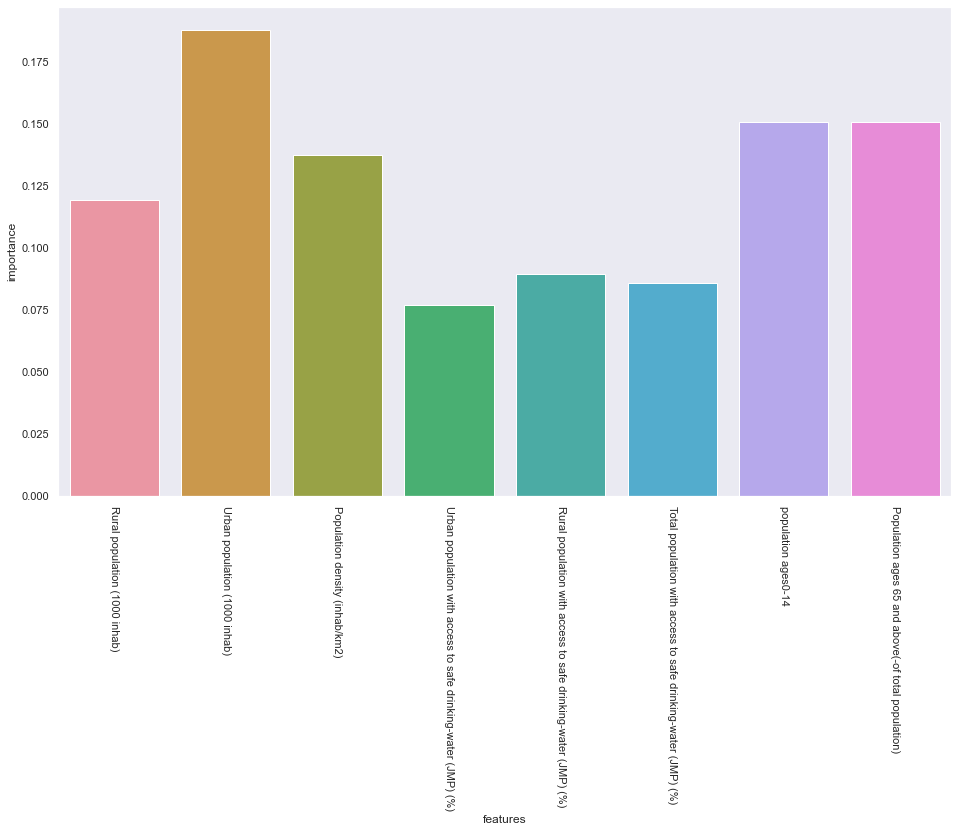

In [12]:
# Visualize the importance

plt.figure(figsize=(16,9))
sns.barplot(x="features",y="importance",data=df_feature_importances)
plt.xticks(rotation=-90)